<a href="https://colab.research.google.com/github/Subhasree5/Ml-Workshop-/blob/main/EDA%20on%20anime%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on "**Top Anime Dataset**"

# Load the dataset

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
anime_data=pd.read_csv("/content/top_anime_dataset.csv")

In [29]:
anime_data.columns

Index(['Name', 'Rating', 'Ranked', 'Popularity', 'Members', 'Type'], dtype='object')

# Print first few records

In [10]:
anime_data.head()

,Name,Rating,Ranked,Popularity,Members,Type
0,Sousou no Frieren,9.32,1,Sep 2023 - Mar 2024,"974,075 members",TV
1,Fullmetal Alchemist: Brotherhood,9.10,2,Apr 2009 - Jul 2010,"3,452,671 members",TV
2,One Piece Fan Letter,9.09,3,Oct 2024 - Oct 2024,"73,667 members",TV
3,Steins;Gate,9.07,4,Apr 2011 - Sep 2011,"2,645,303 members",TV
4,Shingeki no Kyojin Season 3 Part 2,9.05,5,Apr 2019 - Jul 2019,"2,379,562 members",TV


In [6]:
anime_data.shape

(10000, 6)

## **Observation:**There are 10000 rows and 6 columns

# Data Set information

In [11]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10000 non-null  object 
 1   Rating      10000 non-null  float64
 2   Ranked      10000 non-null  int64  
 3   Popularity  10000 non-null  object 
 4   Members     10000 non-null  object 
 5   Type        10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


### **Observation**:In this dataset there are no null values.

# Let us find the statistics of the dataset

In [12]:
anime_data.describe()

,Rating,Ranked
count,10000.000000,10000.00000
mean,6.938317,5000.50000
std,0.632787,2886.89568
min,5.970000,1.00000
25%,6.420000,2500.75000
50%,6.860000,5000.50000
75%,7.360000,7500.25000
max,9.320000,10000.00000


# Check for missing values

In [14]:
anime_data.isnull().sum()

,0
Name,0
Rating,0
Ranked,0
Popularity,0
Members,0
Type,0


###**Observation**: As there are no null values i.e;no missing values.No need to handle missing values

# Check for duplicates

In [15]:
anime_data.duplicated().sum()

0

### **Observation**:There are no duplicates in the data.So no need to delete them

# correlation:

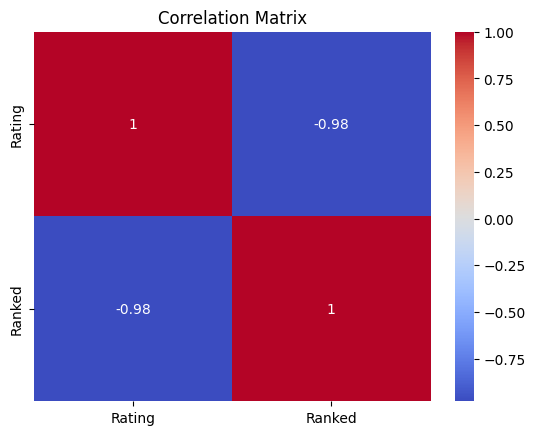

In [33]:
correlation = anime_data[['Rating', 'Ranked']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outliers Detection

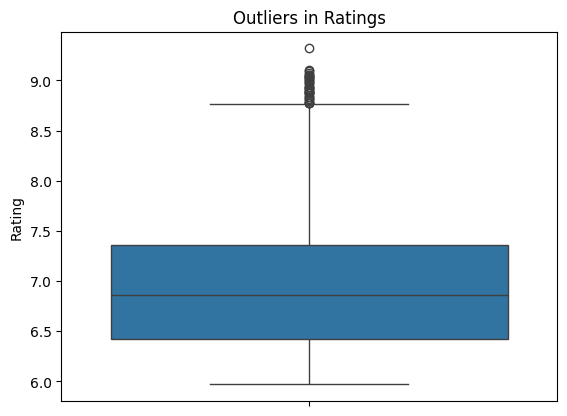

In [31]:
sns.boxplot(anime_data['Rating'])
plt.title('Outliers in Ratings')
plt.show()

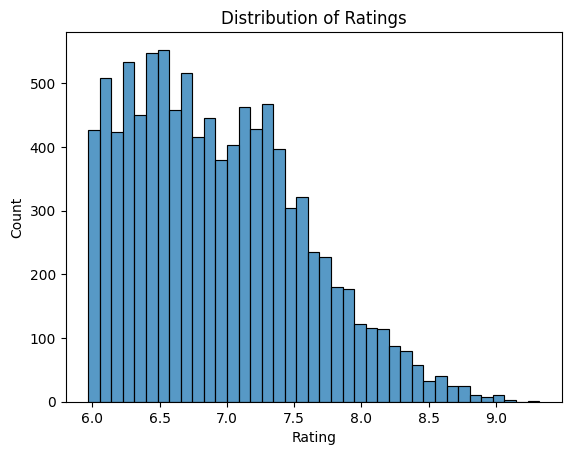

In [30]:
sns.histplot(anime_data['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

##**Observation:** Ratings graph is towards the higher end,with most animes having rating between 6 and 9.A small number of animes have ratings below 5.

# Top 10 anime list

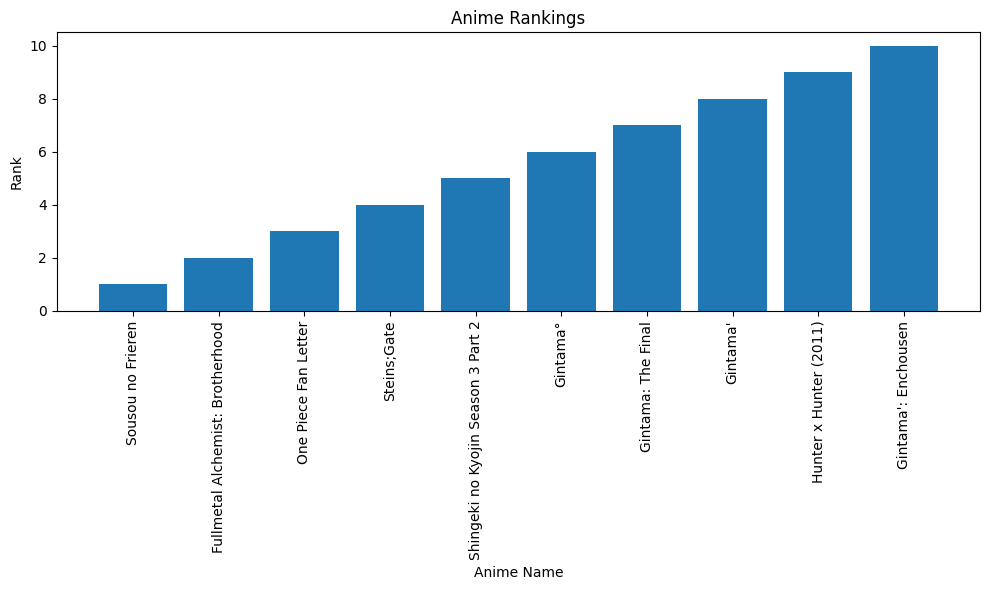

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(anime_data['Name'][:10], anime_data['Ranked'][:10])
plt.xlabel("Anime Name")
plt.ylabel("Rank")
plt.title("Anime Rankings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


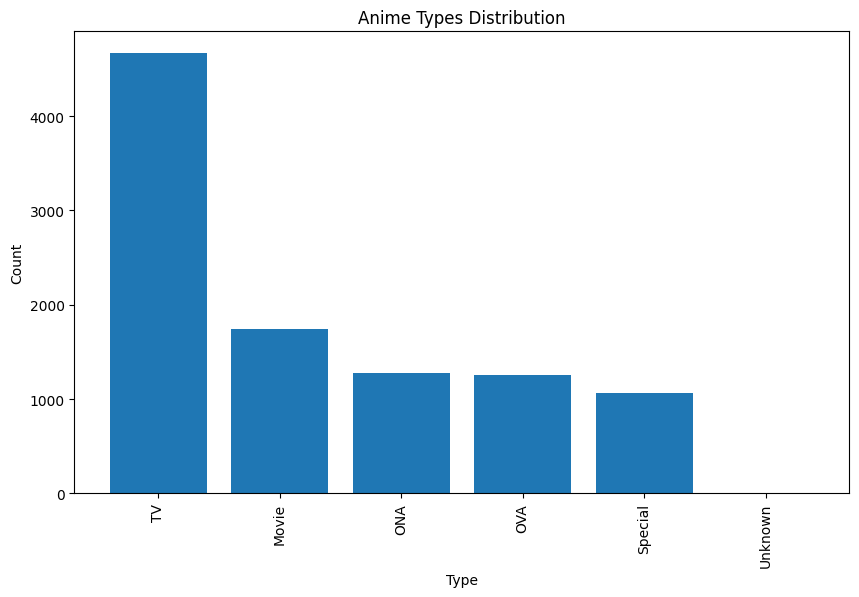

In [25]:
plt.figure(figsize=(10, 6))
type_counts = anime_data['Type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.title('Anime Types Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## **Observation**:TV series dominate the dataset, followed by movies, OVAs, and specials. This indicates that most popular animes are serialized shows

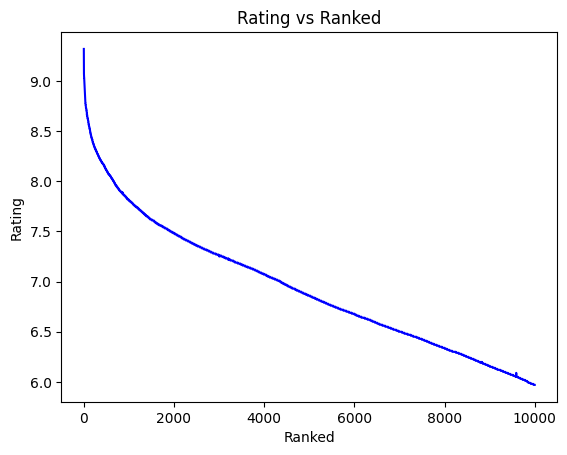

In [26]:
# Line plot for Rating vs Ranked
anime_data = anime_data.sort_values('Ranked')
plt.plot(anime_data['Ranked'], anime_data['Rating'])
plt.title('Rating vs Ranked')
plt.xlabel('Ranked')
plt.ylabel('Rating')
plt.show()

###**Observation:** Higher-ranked animes (lower rank number) tend to have higher ratings, showing a strong correlation between rank and rating

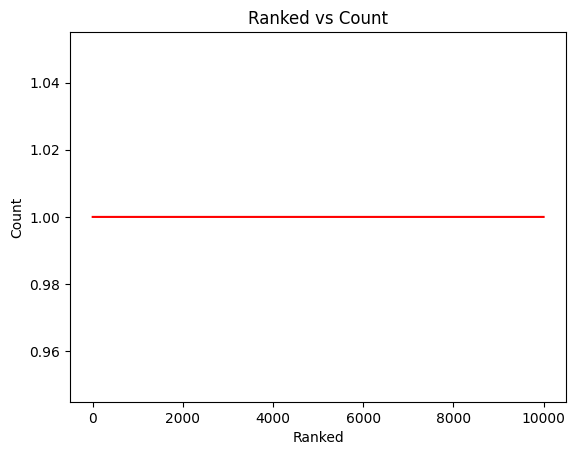

In [27]:
rank_counts = anime_data['Ranked'].value_counts().sort_index()
plt.plot(rank_counts.index, rank_counts.values, color='red')
plt.title('Ranked vs Count')
plt.xlabel('Ranked')
plt.ylabel('Count')
plt.show()

## **Observation**:Most ranks are unique, so the count of each rank is low (mostly 1).

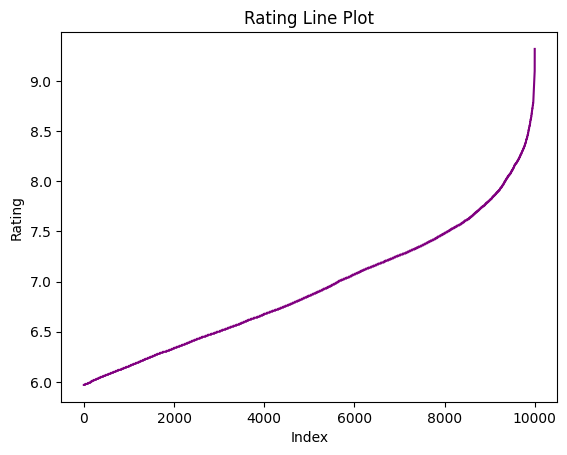

In [28]:
plt.plot(sorted(anime_data['Rating']), color='purple')
plt.title('Rating Line Plot')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.show()

## **Observation:**Ratings generally fall within a stable range

# How Rating impacts Members

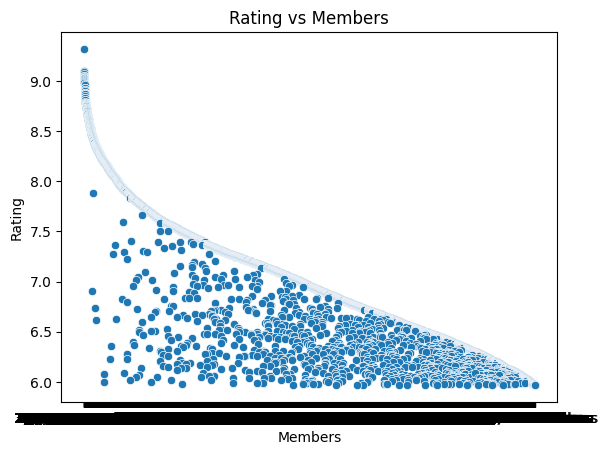

In [34]:
sns.scatterplot(x='Members', y='Rating', data=anime_data)
plt.title('Rating vs Members')
plt.show()

## As the number of members increases, the ratings tend to stabilize between 7.0 and 8.5. This suggests that highly popular animes with a larger audience are usually well-rated.The plot shows high density at moderate membership numbers, which means many animes have a mid-sized audience.

# Type Vs Rating

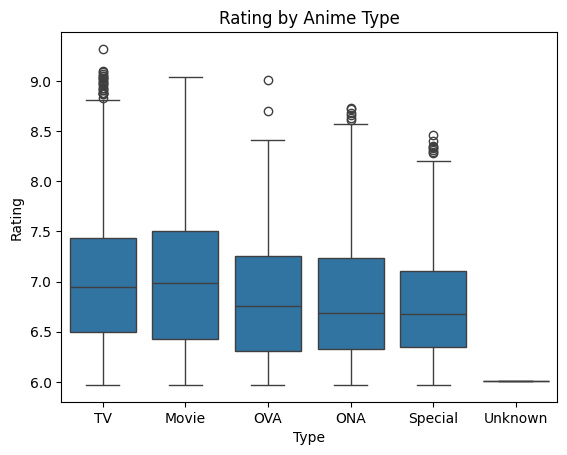

In [35]:
sns.boxplot(x='Type', y='Rating', data=anime_data)
plt.title('Rating by Anime Type')
plt.show()

# **CONCLUSION:---**
##      The analysis of the anime dataset shows that most animes are well-received, with ratings mainly between 6 and 9. Highly ranked animes tend to have better ratings, showing that rankings are a good indicator of audience preference. TV shows make up most of the dataset, but movies and OVAs generally have higher average ratings and better rankings, suggesting they are of higher quality. Popular animes with more members also tend to have higher ratings, showing the influence of audience size. While most animes follow these patterns, there are a few exceptions with unusually low ratings or rankings. Overall, the dataset highlights that TV shows are the most common, but movies and OVAs often stand out in terms of quality.